# Hotelling's Law - Quick Start (ABSESpy)

This notebook demonstrates a compact Hotelling's Law model using ABSESpy.

- Customers are spatial cells (`Customer` extends `PatchCell`)
- Shops are mobile agents (`Shop` extends `Actor`)
- Customers link to nearest+cheapest shop ("prefer")
- Shops adapt price and position

> Files: `examples/hotelling_law/model.py` (implementation)


In [1]:
import matplotlib.pyplot as plt
from omegaconf import OmegaConf

from examples.hotelling_law.model import Hotelling

# Minimal configuration
cfg = OmegaConf.create(
    {
        "model": {"n_agents": 3},
        "time": {"end": 20},
    }
)

model = Hotelling(parameters=cfg, seed=42)
model.run_model(steps=cfg.time.end)

# Visual: shop areas via degree of 'prefer' inbound links
areas = [a.area_count for a in model.agents]
areas

[0, 1, 0]

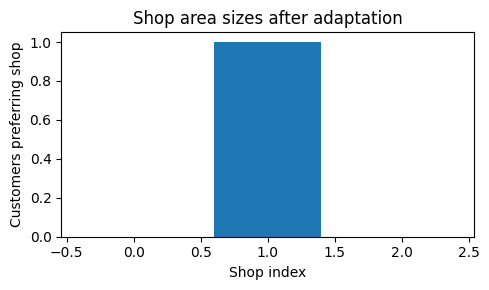

In [2]:
# Simple diagnostic plot of area sizes
fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(range(len(areas)), areas)
ax.set_xlabel("Shop index")
ax.set_ylabel("Customers preferring shop")
ax.set_title("Shop area sizes after adaptation")
fig.tight_layout()
plt.show()

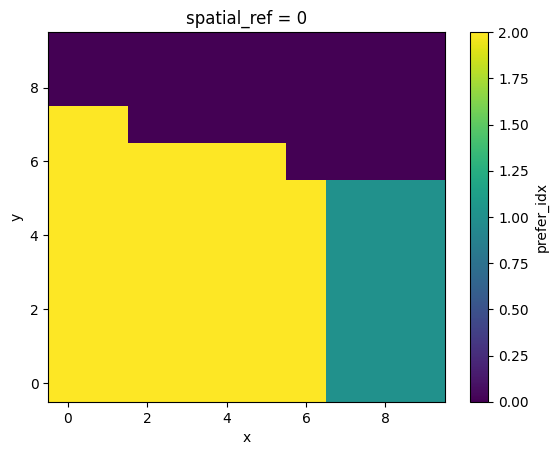

In [3]:
xda = model.nature.major_layer.get_xarray("prefer_idx", update=False)
ax = xda.plot(robust=True)